### Uploading File

In [1]:
from google.colab import files
# Open file chooser to upload
uploaded = files.upload()

Saving train-00000-of-00001.parquet to train-00000-of-00001.parquet


# Part 1: Data Preprocessing

### Importing Dataset

In [2]:
import pandas as pd

df = pd.read_parquet("train-00000-of-00001.parquet")

In [3]:
df

,question,answers
0,why is crop rotation important in farming?,This helps to prevent soil erosion and depleti...
1,What farming practice helps prevent soil erosion?,Crop Rotation
2,what is crop rotation,Crop rotation is the practice of growing a ser...
3,what are the different methods of irrigation?,"surface irrigation, drip irrigation, and sprin..."
4,why is soil health vital?,Soil health is critical to crop growth and pro...
...,...,...
22610,Does cassava mosaic affect the cassava stems?,"Yes, it makes them small and not good for plan..."
22611,How does the pathogen of Phoma Rot spread?,The pathogen of Phoma Rot is seed-borne.
22612,Does cassava have much sugar in it when testing?,"Yes, but not as much as sugar cane"
22613,Can the chemical used for storing affect seed ...,"No, it does not affect germination"


### STEP 1: Check initial dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22615 entries, 0 to 22614
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  22615 non-null  object
 1   answers   22615 non-null  object
dtypes: object(2)
memory usage: 353.5+ KB


In [5]:
print("Initial shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nNull values:\n", df.isnull().sum())

Initial shape: (22615, 2)

Column names: ['question', 'answers']

Null values:
 question    0
answers     0
dtype: int64


### STEP 2: Data Preprocessing

In [6]:
df = df.dropna(subset=["question", "answers"])

In [7]:
df = df[df["question"].str.len() > 20]
df = df[df["answers"].str.len() > 20]
print("Shape after filtering short entries:", df.shape)

Shape after filtering short entries: (18403, 2)


In [9]:
df["question"] = df["question"].str.strip()
df["answers"] = df["answers"].str.strip()

In [10]:
print("\nSample cleaned data:")
print(df.sample(5))


Sample cleaned data:
                                                question  \
8237                      Where does our food come from?   
21006  Can cassava stems be planted immediately after...   
12479          how can crop rotation improves clay soil.   
4837            Suggest the disadvantages of sandy  soil   
11888  name traditional methods that can be used to c...   

                                                 answers  
8237   People in developed countries such as the Unit...  
21006  Cassava stems can be planted immediately after...  
12479  Rotating maize with other crops, such as legum...  
4837   Poor water-holding capacity: Sandy soils have ...  
11888          mixing wood ash or ash from cooking fires  


In [11]:
df

,question,answers
0,why is crop rotation important in farming?,This helps to prevent soil erosion and depleti...
2,what is crop rotation,Crop rotation is the practice of growing a ser...
3,what are the different methods of irrigation?,"surface irrigation, drip irrigation, and sprin..."
4,why is soil health vital?,Soil health is critical to crop growth and pro...
5,what are the causes of soil degradation?,"erosion, compaction, and nutrient depletion"
...,...,...
22609,Cassava and maize which one makes you stronger...,Cassava has more calories and maize has more p...
22610,Does cassava mosaic affect the cassava stems?,"Yes, it makes them small and not good for plan..."
22611,How does the pathogen of Phoma Rot spread?,The pathogen of Phoma Rot is seed-borne.
22612,Does cassava have much sugar in it when testing?,"Yes, but not as much as sugar cane"


### STEP 3: Save cleaned data

In [12]:
df.to_csv("cleaned_agri_qa_dataset.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_agri_qa_dataset.csv'")


✅ Cleaned dataset saved as 'cleaned_agri_qa_dataset.csv'


# Part 2: Model Training

### Step 1: Data Processing and Formatting

In [13]:
# Step 1: Load cleaned data
import pandas as pd
df = pd.read_csv("cleaned_agri_qa_dataset.csv")

In [14]:
# Step 2: Confirm columns and sample data
print(df.columns)
print(df.head())

Index(['question', 'answers'], dtype='object')
                                        question  \
0     why is crop rotation important in farming?   
1                          what is crop rotation   
2  what are the different methods of irrigation?   
3                      why is soil health vital?   
4       what are the causes of soil degradation?   

                                             answers  
0  This helps to prevent soil erosion and depleti...  
1  Crop rotation is the practice of growing a ser...  
2  surface irrigation, drip irrigation, and sprin...  
3  Soil health is critical to crop growth and pro...  
4        erosion, compaction, and nutrient depletion  


In [15]:
# Step 3: Combine into GPT-2 compatible format
def format_row(row):
    return f"<|startoftext|>Question: {row['question']} Answer: {row['answers']}<|endoftext|>"

formatted_data = df.apply(format_row, axis=1)

In [16]:
# Step 4: Save to a .txt file for training
formatted_data.to_csv("gpt2_agri_finetune.txt", index=False, header=False)

In [17]:
print("✅ Formatted data saved to 'gpt2_agri_finetune.txt'")
print("🧾 Sample entry:\n", formatted_data.iloc[0])

✅ Formatted data saved to 'gpt2_agri_finetune.txt'
🧾 Sample entry:
 <|startoftext|>Question: why is crop rotation important in farming? Answer: This helps to prevent soil erosion and depletion, and can also help to control pests and diseases<|endoftext|>


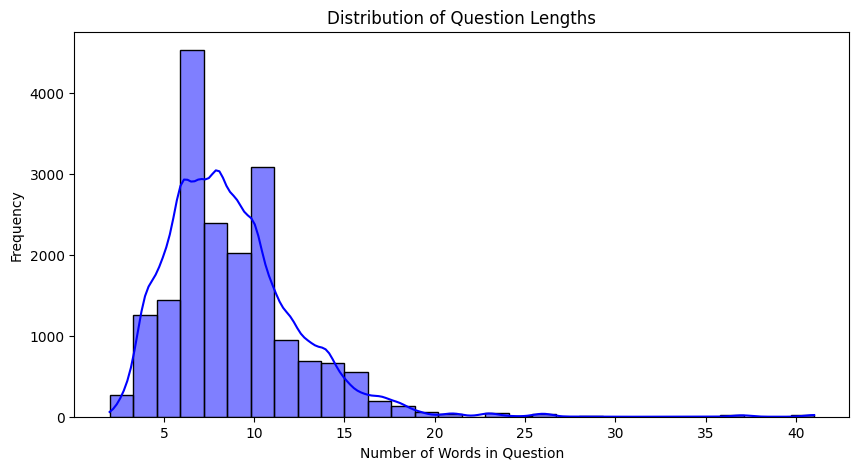

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question length distribution
plt.figure(figsize=(10,5))
sns.histplot(df['question_length'], bins=30, kde=True, color="blue")
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words in Question")
plt.ylabel("Frequency")
plt.show()

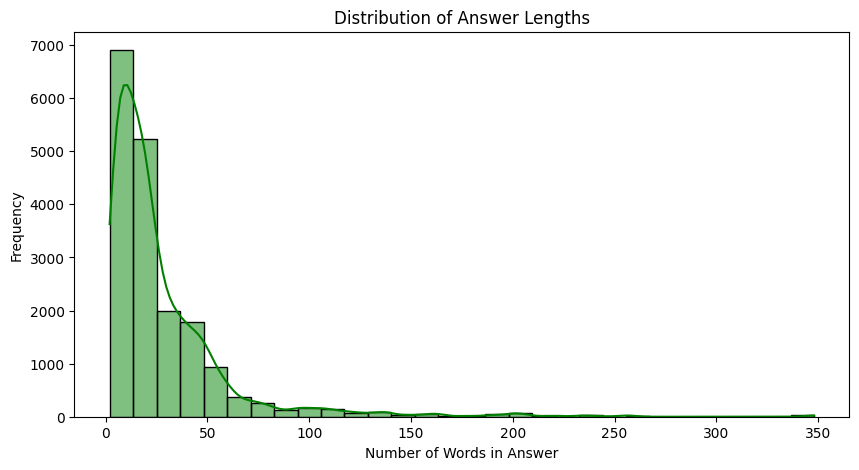

In [25]:
# Answer length distribution
plt.figure(figsize=(10,5))
sns.histplot(df['answer_length'], bins=30, kde=True, color="green")
plt.title("Distribution of Answer Lengths")
plt.xlabel("Number of Words in Answer")
plt.ylabel("Frequency")
plt.show()

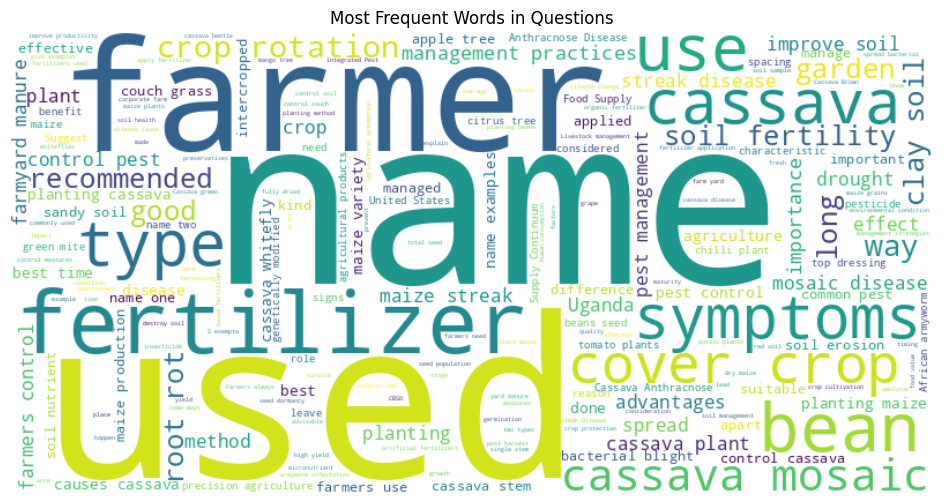

In [27]:
from wordcloud import WordCloud

# WordCloud for Questions
question_text = " ".join(df['question'].astype(str).tolist())
wc_question = WordCloud(width=800, height=400, background_color="white").generate(question_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_question, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Questions")
plt.show()

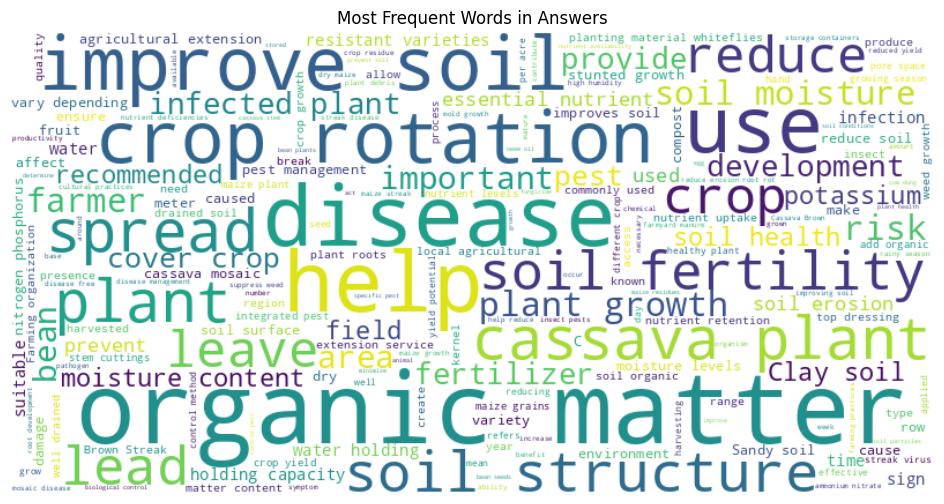

In [28]:
# WordCloud for Answers
answer_text = " ".join(df['answers'].astype(str).tolist())
wc_answer = WordCloud(width=800, height=400, background_color="white").generate(answer_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_answer, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Answers")
plt.show()

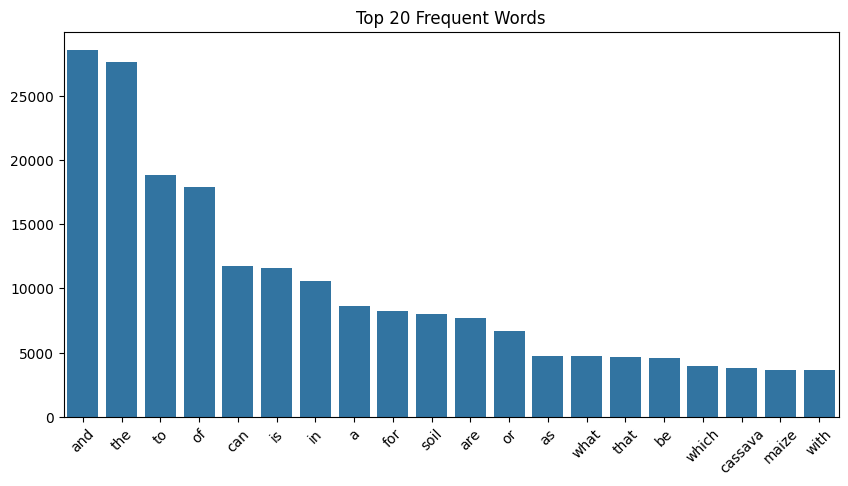

In [30]:
from collections import Counter
import itertools

words = list(itertools.chain.from_iterable(df['question'].astype(str).str.split())) + \
        list(itertools.chain.from_iterable(df['answers'].astype(str).str.split()))

word_counts = Counter(words)
top_words = word_counts.most_common(20)

plt.figure(figsize=(10,5))
sns.barplot(x=[w for w, _ in top_words], y=[c for _, c in top_words])
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words")
plt.show()

### Step 2: Loading and Configuring the GPT-2 Model

In [ ]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 2.6.0+cu124
CUDA available: True


In [ ]:
# Step 1: Load GPT-2 tokenizer and model
from transformers import GPT2Tokenizer, GPT2LMHeadModel

model_name = "gpt2"  # or 'gpt2-medium' if your GPU allows
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Step 2: Add special tokens if they aren't already there
special_tokens = {"pad_token": "<|pad|>",
                  "bos_token": "<|startoftext|>",
                  "eos_token": "<|endoftext|>"}

tokenizer.add_special_tokens(special_tokens)
model.resize_token_embeddings(len(tokenizer))  # Resize model's token embeddings

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(50259, 768)

In [ ]:
# Step 3: Save tokenizer and model locally
tokenizer.save_pretrained("models/tokenizer/")
model.save_pretrained("models/gpt2-base/")

print("✅ GPT-2 model and tokenizer loaded and configured with special tokens.")

✅ GPT-2 model and tokenizer loaded and configured with special tokens.


### Step 3: Fine-tuning the GPT-2 Model

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

In [ ]:
# Load tokenizer and model from previous step
tokenizer = GPT2Tokenizer.from_pretrained("models/tokenizer/")
model = GPT2LMHeadModel.from_pretrained("models/gpt2-base/")

In [ ]:
# Step 1: Load dataset for training
def load_dataset(file_path, tokenizer, block_size=512):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )

train_dataset = load_dataset("gpt2_agri_finetune.txt", tokenizer)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
# Step 2: Create data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

In [ ]:
# Step 3: Set up training arguments
training_args = TrainingArguments(
    output_dir="./models/gpt2-finetuned-agri",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    logging_steps=100,
    logging_dir='./logs',
    prediction_loss_only=True
)

In [ ]:
# Step 4: Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator
)

In [ ]:
# Step 5: Start training
trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jisan3325 (jisan3325-nocomp) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
100,2.834800
200,2.252200
300,2.015700
400,1.813500
500,1.685500
600,1.494800
700,1.329600
800,1.293600
900,1.132700
1000,1.066500


TrainOutput(global_step=2964, training_loss=0.9966415606046978, metrics={'train_runtime': 1092.024, 'train_samples_per_second': 5.428, 'train_steps_per_second': 2.714, 'total_flos': 1548939165696000.0, 'train_loss': 0.9966415606046978, 'epoch': 3.0})

### Step 4: Evaluating the Fine-tuned Model

#### A. Compute Perplexity

In [ ]:
from datasets import load_dataset
from transformers import TextDataset, DataCollatorForLanguageModeling, GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
import math

In [ ]:
# Load model and tokenizer
model = GPT2LMHeadModel.from_pretrained("models/gpt2-finetuned-agri/checkpoint-2964").to("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = GPT2Tokenizer.from_pretrained("models/tokenizer")

In [ ]:
# Reuse preprocessed text file
eval_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="gpt2_agri_finetune.txt",  # or use a separate val file
    block_size=512
)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
)

training_args = TrainingArguments(
    output_dir="./eval",
    per_device_eval_batch_size=2
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
)

In [ ]:
eval_results = trainer.evaluate()
perplexity = math.exp(eval_results["eval_loss"])
print(f"✅ Perplexity: {perplexity:.2f}")

✅ Perplexity: 1.46


### Step 5: Loading the Fine-tuned Model and Saving in drive

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("models/tokenizer")

In [ ]:
# Load both models
vanilla_model = GPT2LMHeadModel.from_pretrained("gpt2")  # base GPT-2
finetuned_model = GPT2LMHeadModel.from_pretrained("models/gpt2-finetuned-agri")

In [ ]:
# Make sure models are in eval mode
vanilla_model.eval()
finetuned_model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50259, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50259, bias=False)
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save_pretrained("/content/drive/MyDrive/Agri_Model")
tokenizer.save_pretrained("/content/drive/MyDrive/Agri_Model")

Mounted at /content/drive


('/content/drive/MyDrive/Agri_Model/tokenizer_config.json',
 '/content/drive/MyDrive/Agri_Model/special_tokens_map.json',
 '/content/drive/MyDrive/Agri_Model/vocab.json',
 '/content/drive/MyDrive/Agri_Model/merges.txt',
 '/content/drive/MyDrive/Agri_Model/added_tokens.json')

### Step 6: Generating Responses with Different Prompts

In [ ]:
import torch

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# Move models to device
vanilla_model = vanilla_model.to(device)
finetuned_model = finetuned_model.to(device)

In [ ]:
# Function to generate response
def generate_response(model, prompt, max_length=100):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_length=max_length,
            pad_token_id=tokenizer.pad_token_id,
            bos_token_id=tokenizer.bos_token_id,
            eos_token_id=tokenizer.eos_token_id,
            do_sample=True,
            top_k=50,
            top_p=0.95,
            temperature=0.9
        )
    return tokenizer.decode(output[0], skip_special_tokens=True)

#### A. First Prompt

In [ ]:
# Sample question
question = "How can I control the spread of fungal diseases in my tomato plants?"
# Separate prompts
vanilla_prompt = f"Question: {question} Answer:"
finetuned_prompt = f"<|startoftext|>Question: {question} Answer:"

In [ ]:
# Generate responses
vanilla_answer = generate_response(vanilla_model, vanilla_prompt)
finetuned_answer = generate_response(finetuned_model, finetuned_prompt)

In [ ]:
import re

def clean_response(raw_output, prompt):
    """
    Remove the prompt and keep only the generated answer in a single line.
    """
    # Remove the prompt from output
    cleaned = raw_output.replace(prompt, "").strip()

    # If "Answer:" is repeated, split and get only what's after
    if "Answer:" in cleaned:
        cleaned = cleaned.split("Answer:")[-1].strip()

    # Replace newlines and collapse multiple whitespaces into one space
    cleaned = re.sub(r"\s+", " ", cleaned)

    return cleaned


In [ ]:
# Clean answers
vanilla_clean = clean_response(vanilla_answer, vanilla_prompt)
finetuned_clean = clean_response(finetuned_answer, finetuned_prompt)

# Display side-by-side
print("🔹 Question:", question)
print("\n🔸 Vanilla GPT-2 Response:\n", vanilla_clean)
print("\n✅ Fine-Tuned GPT-2 Response:\n", finetuned_clean)


🔹 Question: How can I control the spread of fungal diseases in my tomato plants?

🔸 Vanilla GPT-2 Response:
 By cultivating a variety of fresh, wild tomatoes grown to maximum productivity. These tomatoes are the best in every aspect. You don't have to go all the way around to see how they work. Also, most of them have just a single growth zone. When we grow tomatoes, we plant them all seasonally, with very little attention to the temperature of the soil and forages for nutrients. They don

✅ Fine-Tuned GPT-2 Response:
 To control the spread of these diseases in tomato plants, it's important to implement disease-free planting material and avoid excessive use of fungicides. Additionally, applying fungicides in the garden can help control fungal infection and prevent the spread of new pathogens.


#### B. Second Prompt

In [ ]:
# Sample question
question = "How is the spread of armyworms facilitated, and why is it challenging to contain their spread?"
# Separate prompts
vanilla_prompt = f"Question: {question} Answer:"
finetuned_prompt = f"<|startoftext|>Question: {question} Answer:"

In [ ]:
# Generate responses
vanilla_answer = generate_response(vanilla_model, vanilla_prompt)
finetuned_answer = generate_response(finetuned_model, finetuned_prompt)

In [ ]:
import re

def clean_response(raw_output, prompt):
    """
    Remove the prompt and keep only the generated answer in a single line.
    """
    # Remove the prompt from output
    cleaned = raw_output.replace(prompt, "").strip()

    # If "Answer:" is repeated, split and get only what's after
    if "Answer:" in cleaned:
        cleaned = cleaned.split("Answer:")[-1].strip()

    # Replace newlines and collapse multiple whitespaces into one space
    cleaned = re.sub(r"\s+", " ", cleaned)

    return cleaned


In [ ]:
# Clean answers
vanilla_clean = clean_response(vanilla_answer, vanilla_prompt)
finetuned_clean = clean_response(finetuned_answer, finetuned_prompt)

# Display side-by-side
print("🔹 Question:", question)
print("\n🔸 Vanilla GPT-2 Response:\n", vanilla_clean)
print("\n✅ Fine-Tuned GPT-2 Response:\n", finetuned_clean)


🔹 Question: How is the spread of armyworms facilitated, and why is it challenging to contain their spread?

🔸 Vanilla GPT-2 Response:
 A significant proportion of the population is transported across the continent. The spread of armyworms is challenging because of a wide spread of food. There is a need for more food sources, therefore, and hence there is an increased demand for more food sources in the food chains. The food chain is a highly social structure and therefore, many diseases can be diagnosed and treated in a relatively

✅ Fine-Tuned GPT-2 Response:
 The spread of armyworms is facilitated by their ability to fly long distances, which makes it difficult to contain their spread. The pest can also survive in crop residues, making it challenging to eradicate them completely
